<p style = "color : red ; font-size : 35px " > Analysis of ML algorithms in Breast Cancer Prediction <br> <br> <br> </p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )
cancer_df.head(5 )

Shape of the data :  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# we have only 1 categorical feature 

cancer_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Little bit of Preprocessing 


In [5]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score 

In [6]:
y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
X = cancer_df.values

scaler =  StandardScaler()
scaler.fit(X)
scaled_x = scaler.transform(X )

# Decision   tree 

In [7]:
accuracies = []  # stores the accuracies of all classifier for comparison purpose 

In [8]:
depths = [i for i in range(3, 10 )]
for depth in depths :
    tree_clf = DecisionTreeClassifier(criterion= "entropy" , max_depth= depth , random_state= 3 ) 
    y_pred = cross_val_predict(tree_clf , X , y , cv = 10 ) 
    print ("----  Depth : ---- " , depth ) 
    print("Accuracy Score : " , round(accuracy_score(y , y_pred ) * 100 , 2 )  )
    print("precision score : " , round(precision_score(y , y_pred , average ='weighted') * 100 , 2 ) )
    print("Recall score : " , round( recall_score(y , y_pred , average = 'weighted') * 100  , 2 ) )
    print("f1 score : " , round(f1_score(y , y_pred , average = "weighted") * 100  , 2 )) 

----  Depth : ----  3
Accuracy Score :  93.32
precision score :  93.32
Recall score :  93.32
f1 score :  93.32
----  Depth : ----  4
Accuracy Score :  93.5
precision score :  93.48
Recall score :  93.5
f1 score :  93.48
----  Depth : ----  5
Accuracy Score :  93.85
precision score :  93.86
Recall score :  93.85
f1 score :  93.85
----  Depth : ----  6
Accuracy Score :  92.97
precision score :  93.03
Recall score :  92.97
f1 score :  92.99
----  Depth : ----  7
Accuracy Score :  93.15
precision score :  93.17
Recall score :  93.15
f1 score :  93.16
----  Depth : ----  8
Accuracy Score :  93.15
precision score :  93.17
Recall score :  93.15
f1 score :  93.16
----  Depth : ----  9
Accuracy Score :  93.15
precision score :  93.17
Recall score :  93.15
f1 score :  93.16


<p style = "color : darkgreen ; font-size : 18px ; font-style : monospace " > for depth = 5 , accuracy using 10-fold cross validation is 93.85 %  </p> 

In [9]:
accuracies.append(93.85)

# Logistic Regression 

In [10]:
log_model = LogisticRegression(solver = "liblinear")

In [11]:
y_pred = cross_val_predict(log_model , scaled_x , y , cv = 10 ) 
accuracy_log = round(accuracy_score(y , y_pred ) *100  , 2 ) 
accuracies.append(accuracy_log)
confusion_matrix_log = confusion_matrix(y , y_pred )  
precision_score_log = precision_score(y , y_pred , average= 'weighted') * 100
recall_score_log = recall_score(y , y_pred,  average= 'weighted') * 100 
f1_score_log = f1_score(y , y_pred , average = 'weighted')  * 100 

In [12]:
print ("Confusion Matrix : " , confusion_matrix_log , sep = '\n'  , end = '\n\n') 
print("Precision score : " , precision_score_log ) 
print("Recall score : " ,  recall_score_log ) 
print("f1 score : " , f1_score_log  )

Confusion Matrix : 
[[354   3]
 [  7 205]]

Precision score :  98.24602285047057
Recall score :  98.24253075571178
f1 score :  98.23905731205346


<p style = "color : green ; font-size : 18px"> For logistic Regression, we are getting an accuracy of 98.24
</p>

<h1 style = "color : green ;">Visualization  </h1>

In [13]:
classification_model = [ "Dec_tree" ,"log_reg" ]
test_df = pd.DataFrame({"classification_model" : classification_model , "Accuracies" : accuracies } )
test_df 

,classification_model,Accuracies
0,Dec_tree,93.85
1,log_reg,98.24


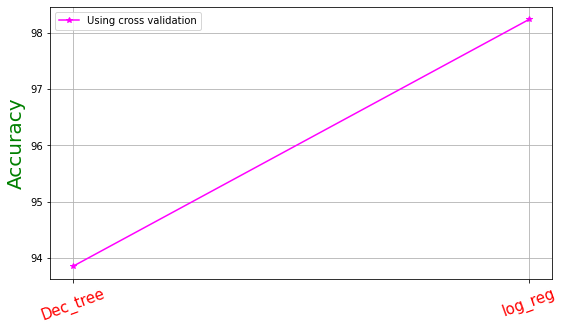

In [14]:
plt.figure(figsize= (9,5 ))
plt.plot(classification_model , accuracies , marker = "*" , label = "Using cross validation" , color = "magenta")
plt.ylabel("Accuracy" , color = "green" , fontsize = 20 )
plt.xticks(color = "red" , fontsize = 15 , rotation = 20 )
plt.grid(True)
plt.legend()
plt.savefig("compare.png")
plt.show()

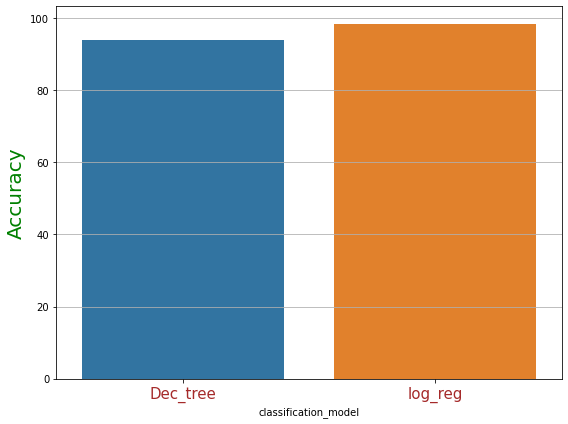

In [15]:
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
sns.barplot(x = "classification_model" , y = "Accuracies" , data = test_df)
plt.xticks(color = "brown" , fontsize = 15 )
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.tight_layout()
plt.savefig("first_ana1.png")
plt.show() 

# THE END

In [16]:
? LogisticRegression